#Setup

###Drive setup

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


nos movemos a la carpeta del proyecto

In [13]:
%cd '/content/drive/MyDrive/Colab_Notebooks/Pytorch_Course'

/content/drive/MyDrive/Colab_Notebooks/Pytorch_Course


###Course repository setup

clonamos el repositorio del curso en la carpeta de google drive

In [ ]:
!git clone https://github.com/JuanPabloMF/dl-pytorch

Cloning into 'dl-pytorch'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Unpacking objects: 100% (36/36), done.


descomprimimos el dataset que se encuentra en el repositorio que acabamos de descargar

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Pytorch_Course/dl-pytorch/datasets/64x64_SIGNS.zip

###Paths setup

configuramos las rutas de python con sys

In [22]:
import sys 

course_path = '/content/drive/MyDrive/Colab_Notebooks/Pytorch_Course/dl-pytorch/'

sys.path.append(course_path)

con esto podremos descargar las librerias ad-hok del curso creadas por el profe y que se encuentran dentro del repositorio

In [23]:
import plot_helpers
from plot_helpers import imshow

###Libraries imports

In [1]:
import torch 
import torch.nn as nn #neural networks
import torch.nn.functional as F #capas sin parametros
import os
import PIL 
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim #mtodo de optimizacion

#Understanding PyTorch API

###tensores

In [ ]:
#crear tensores random
A = torch.randn((2,2,3))
#saber las dimensiones del tensor
print(A)
A.size()

tensor([[[-1.1492, -0.1411, -1.0163],
         [-0.1837,  0.7407, -0.5544]],

        [[-0.1454, -1.7273,  0.7094],
         [-0.9254, -0.2633,  2.1910]]])


torch.Size([2, 2, 3])

In [ ]:
#pillar valores en especifico
print(A[0][0][2])
#slicing
print(A[0,0,1:])

tensor(-1.0163)
tensor([-0.1411, -1.0163])


In [ ]:
C = torch.zeros((5,5)) #crea matriz de 5x5
print(C)
#saber el tipo que maneja el tensor
C.dtype

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


torch.float32

In [ ]:
D = torch.randint(2,(1,5)) #matriz de 5x2 de randoms entre 0 y 1 
print(D)
print(D.dtype)
D.float().dtype #castear un tensor

tensor([[1, 0, 1, 0, 1]])
torch.int64


torch.float32

In [ ]:
#setear todos los tensores por default 
torch.set_default_tensor_type('torch.FloatTensor')

In [ ]:
#como llevar los tensores a la GPU

print(C.device) # saber si el tensor esta en cpu o gpu
print(torch.cuda.is_available())#para saber si la gpu esta disponible


cpu
True


In [ ]:
#si estas en google colab , para que la gpu este available nesesitas estar en un entorno con gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
x = torch.randn(3,5)
y = torch.ones_like(x,device=device) #gpu(if device is gpu)
print(y)
#ahora x esta en cpu y y en gpu asi que no podremos hacer operaciones entre ellas, para eso debemos pasar x en gpu
x = x.to(device)#gpu
print(x)
print(x+y)
#para treaer de nuevo a cpu es x.cpu()

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')
tensor([[ 0.1284, -0.5736, -0.5163, -0.6316, -0.5880],
        [ 2.8238,  2.1928,  1.1765,  0.5481,  1.4673],
        [-0.3602,  0.2980,  0.1792,  0.9788, -0.5634]], device='cuda:0')
tensor([[1.1284, 0.4264, 0.4837, 0.3684, 0.4120],
        [3.8238, 3.1928, 2.1765, 1.5481, 2.4673],
        [0.6398, 1.2980, 1.1792, 1.9788, 0.4366]], device='cuda:0')


Nos descargamos un dataset de pytorch

In [ ]:
from torchvision import datasets

In [ ]:
!mkdir content/cifar10
cifar = datasets.CIFAR10('/content/cifar10', download=True)

mkdir: cannot create directory ‘content/cifar10’: No such file or directory


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar10/cifar-10-python.tar.gz to /content/cifar10


In [ ]:
cifar.data #ver el array de datos

###ANN

capas de una red neuronal

In [ ]:
linear = nn.Linear(in_features = 4096, out_features=10) #tensores de dim 1 de input
#capa convolucional, in_channels=3, por el rgb,  kernel_size default = 3, 
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3,stride=1,padding=1) #modificar los canales pero no el tamaño de la imagen
relu = nn.ReLU(False) #hace que reciba en output un nuevo tensor y que no toque el tensor original

In [ ]:
#probemos las capas pasando un input y recibiendo un output(recordemos que cada capa es una funcion)

#la capa lineal (a veces llamada fully conected)
x = torch.randn(4096)
y = linear(x)
print(y.size())

#la capa convolucional
x = torch.randn(1,3,7,7) #esto podria ser por ejemplo una imagen de tres canales 7x7 pixeles
y = conv(x)
print(y.size())
z = relu(x) #en vez de 1 a -1 es de 0 a n 
print(z)

In [ ]:
#Veamos los parametros de la capa linear
#linear.named_parameters() devuelve una tupla con el nombre y los tensores

for name, p in linear.named_parameters():
  print(name)
  print(p.size())
  

weight
torch.Size([10, 4096])
bias
torch.Size([10])


Crear una red neuronal

In [ ]:
"""
class Net(nn.Module): #creamos clase net que hereda de nn.Module

  def __init__(self,num_channels): #num_channnels es un parametro que representa la canatidad de canales por la que va a expandir la iamgen
    super(Net,self).__init__() #inicializamos la clase padre
   
    self.num_channels = num_channels

    #capa convolucional
    self.conv1 = nn.Conv2d(3,self.num_channels,kernel_size= 3,stride=1, padding = 1)
    self.conv2 = nn.Conv2d(self.num_channels,self.num_channels * 2,kernel_size= 3,stride=1, padding = 1)
    self.conv3 =nn.Conv2d(self.num_channels,self.num_channels * 4,kernel_size= 3,stride=1, padding = 1)

    #capa de neuronas
    self.fc1 = nn.Linear(self.num_channel*4*8*8, self.num_channels*4) #la ultima salida es num_capas*4 x 8 x 8, la salida es *4 arbitrariamente
    self.fc2 = nn.Linear(self.num_channel*4, 6) #entrada igual a la salida anterior, salida igual a 6 porque vamos a usar un dataset con 6 clases

  def forward(self,x):
    #Empieza 3x64x64
    x = self.conv1(x) #self.num_channels x 64x64
    x = F.relu(F.max_pool2d( x, 2)) #num_channels x 32x32
    x = self.conv2(x) #num_channels*2 32x32
    x = F.relu(F.max_pool2d( x, 2)) #num_channels*2 x 16x16
    x = self.conv3(x) #num_channels*4 16x15
    x = F.relu(F.max_pool2d(x, 2))#num_channels*4 x 8x8

    #flatten 
    x = x.view(-1, self.num_channels*4*8*8)

    #fc(full conected)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)

    return x


"""


In [24]:
class Net(nn.Module):
  def __init__(self, num_channels):
    super(Net,self).__init__()
    
    self.num_channels = num_channels
    
    self.conv1 = nn.Conv2d(3, self.num_channels, 3, stride = 1, padding = 1)
    self.conv2 = nn.Conv2d(self.num_channels, self.num_channels*2, 3, stride = 1, padding = 1)
    self.conv3 = nn.Conv2d(self.num_channels*2, self.num_channels*4, 3, stride = 1, padding = 1)
    
    self.fc1 = nn.Linear(self.num_channels*4*8*8, self.num_channels*4)
    self.fc2 = nn.Linear(self.num_channels*4, 6)
    
  def forward(self,x):
      #Empieza 3x64x64
      x = self.conv1(x) # num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x, 2)) # num_channels x 32 x 32
      x = self.conv2(x) # num_channels*2 x 32 x32
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*2 x 16 x 16
      x = self.conv3(x) # num_channels*4 x16x16
      x = F.relu(F.max_pool2d(x, 2)) # num_channels*4 x 8 x 8

      #flatten
      x = x.view(-1, self.num_channels*4*8*8)

      #fc
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      #log_softmax

      x = F.log_softmax(x, dim=1)

      return x   

cargar datos 

In [96]:
!ls '{course_path+"/datasets/64x64_SIGNS/"}'

test_signs  train_signs  val_signs


In [97]:
class SIGNSDataset(Dataset): #hereda de la clase dataset de pytorch
  def __init__(self, base_dir, split="train",transform=None):
    path = os.path.join(base_dir, "{}_signs".format(split))
    files = os.listdir(path)
    #genera los caminos hacia las imagenes
    self.filenames = [os.path.join(path, f) for f in files if f.endswith(".jpg")] 
    
    self.targets = [int(f[0]) for f in files]

    self.transform = transform

  #entrega cuantas imagenes existen
  def __len__(self):
    return len(self.filenames)

  #entrga las imagenes
  def __getitem__(self,idx):
    image = Image.open(self.filenames[idx])
    if self.transform :
      image = self.transform(image)
   
    return image,self.targets[idx]

In [98]:
base_dir = course_path+"/datasets/64x64_SIGNS"
base_dir

'/content/drive/MyDrive/Colab_Notebooks/Pytorch_Course/dl-pytorch//datasets/64x64_SIGNS'

In [99]:
#cargar el datasetbase_dir

signs = SIGNSDataset(base_dir,split="train")

print(len(signs))
print(signs[0][0])

864
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7FCC72202C10>


ENTRENAR EL MODELO

In [ ]:
trainset = SIGNSDataset(base_dir, split="train", transform=transforms.ToTensor())

In [100]:
#el dataloader carga las imagenes por baches
dataloader = DataLoader(trainset, batch_size=32)

In [ ]:
from torchvision.utils import make_grid

#iteramos el dataloader 
for inputs, targets in dataloader:
  out = make_grid(inputs)
  imshow(out)
  print(targets)
  break

In [102]:
device = torch.device("cuda") #definimos cuda


In [103]:
net = Net(32).to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [104]:
#clase que sirve para logs
class RunningMetric(): 
  def __init__(self):
    self.S = 0
    self.N = 0

  def update(self, val, size):
    self.S += val
    self.N += size

  def __call__(self):
    return self.S/float(self.N)

loop de entrenamiento

In [ ]:
num_epochs = 100

In [ ]:

for epoch in range(num_epochs):
  print('Epoch {}/{}'.format(epoch+1,num_epochs))
  print('-'*12)

  running_loss = RunningMetric() #loss: tasa de error de la red, se usa mas para encontrar los settings y el entrenamiento
  running_acc = RunningMetric() #accuracy: porcentaje de aciertos, es mas general


  for inputs, targets in dataloader:
    inputs, targets = inputs.to(device), targets.to(device) #pasamos tensores a gpu
    optimizer.zero_grad() #es un estandar, reiniciamos los gradientes a 0 en cada batch

    outputs = net(inputs) #pasamos los outputs por la red
    _,preds = torch.max(outputs,1) #conseguimos las predicciones
    loss = loss_fn(outputs, targets)

    loss.backward() #gradientes calculados automaticamente
    optimizer.step() #actualiza las perillas o los parametros

    #loggeo
    batch_size = inputs.size()[0]
    running_loss.update(loss.item()*batch_size,
                       batch_size)
    running_acc.update(torch.sum(preds == targets).float(),
                       batch_size)

  print("Loss:{:.4f}  Acc:{:.4f} ".format(running_loss(), running_acc()))



####Optimizacion y performance

Una buena estrategia para hacer modelos es 
-Crear un modelo con no tanta data y Underfiting

-Cargar mas data hasta que llegue al overfitting

-Usar regulatizacion para que no haya overfiting y el modelo funcione dpm

__________________

**Para aumentra el fitting**

-Agregar capas

-Aumentar cantidad de neuronas x capa

-Aumentar epochs

-Eligir un metodo de optimizacion mas complejo (adam, momentum)

**Para disminuir el fitting**

-Entrenar con mas datos

-Usar tecnicas de regularizacion


#####AUTOGRAD Y METODOS DE OPTIMIZACION
ver los gradientes

In [29]:
#creamos una matriz
x = torch.Tensor(2)
#habilitamos gradiente en el tensor 
x.requires_grad = True
#creamos loss
loss = 13*x[0] + 7*x[1] + 1
#hacemos backpropagation
loss.backward()
print(x)
x.grad

tensor([4.1754e-34, 0.0000e+00], requires_grad=True)


tensor([13.,  7.])

In [30]:
x = torch.rand((2,3), requires_grad=True) #creamos un tensor con grad habilitado
y = torch.Tensor([[1,2],[3,4]]) #creamos una matriz
loss = y.mm(x) #hacemos operacion matricial
loss = loss.sum() 
loss.backward()
x.grad

tensor([[4., 4., 4.],
        [6., 6., 6.]])

In [32]:
#todos los tensores dentro del with tendran los gradientes activados y si esta en false se ignora el backprogpagation
with torch.set_grad_enabled(True):
  #distintas operaciones matriciales
  pass

Revisamos la libreria optimizers viz

In [38]:
import optimizers_viz as optviz

In [34]:
problem = optviz.build_beales_problem()

constructors = optviz.build_optimizers(problem)

params = optviz.build_params(problem)

WARN: your minima is not the true minima 3.814872159775163 0.13321906833011843


/content/drive/MyDrive/Colab_Notebooks/Pytorch_Course/dl-pytorch/optimizers_viz.py:95: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  return torch.Tensor(x)


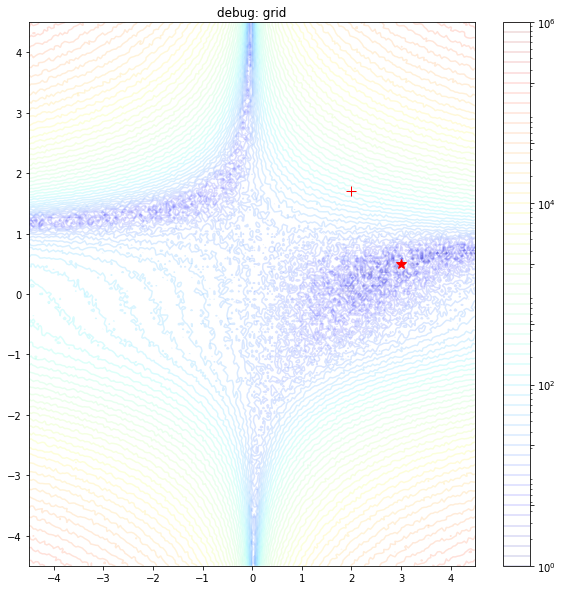

In [44]:
optviz.plot_minimized_function(params)

In [36]:
#los distintos optimizadores
constructors

{'SGD': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'momentum': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'momentum_dampen': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'nesterov': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'nesterov_decay': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adadelta': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adagrad': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adamax': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'RMSprop': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>,
 'Adam': <function optimizers_viz.build_optimizers.<locals>.<lambda>(params)>}

In [43]:
#con esto vemos los resultados de cada optimizador respecto el problema
"""
• SGD con Momentum
• ADAM
• RMSprop
"""
#zpaths, results, distance, lrs = optviz.run_optimizers(problem, constructors, params)

'\n• SGD con Momentum\n• ADAM\n• RMSprop\n'

#####¿Cómo evaluar la performance de la red neuronal?


In [105]:
"""
Hay que dividir el set de entrenamiento en tres grupos, train para entrenat, val para tunear los hiperparametros 
y test para ver la efficiencia del modelo
"""

trainset = SIGNSDataset(base_dir, split="train", transform=transforms.ToTensor())
trainloader = DataLoader(trainset, batch_size=32)

valset = SIGNSDataset(base_dir, split="val", transform=transforms.ToTensor())
valloader = DataLoader(trainset, batch_size=32)

testset = SIGNSDataset(base_dir, split="test", transform=transforms.ToTensor())
testloader = DataLoader(trainset, batch_size=32)

In [106]:
#para abstraer el codigo metemos la data en un diccionario
dataloaders ={
    "train":trainloader,
    "val":valloader,
    "test":testloader
}

#####REGULARIZACION

- L2

- Batch Norm

- Dropout

- Data agumentation

In [107]:
#ejemplo de data agumentation
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(), #gira por un angulo
     transforms.ToTensor(), #convierte una PIL Image o numpy.ndarray a un Tensor flotante.
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5,0.5)) #normalizacion , 0.5 es el valor default
    ]
)

In [108]:
#aplicar BATCH NORM y DROPOUT en una red 

class Net(nn.Module):
  def __init__(self, num_channels):
    super(Net,self).__init__()
    
    self.num_channels = num_channels
    
    self.conv1 = nn.Conv2d(3, self.num_channels, 3, stride = 1, padding = 1)
    self.bn1 = nn.BatchNorm2d(self.num_channels) #batch norm
    self.conv2 = nn.Conv2d(self.num_channels, self.num_channels*2, 3, stride = 1, padding = 1)
    self.bn2 = nn.BatchNorm2d(self.num_channels*2) #batch norm
    self.conv3 = nn.Conv2d(self.num_channels*2, self.num_channels*4, 3, stride = 1, padding = 1)
    self.bn3 = nn.BatchNorm2d(self.num_channels*4) #batch norm
    
    self.fc1 = nn.Linear(self.num_channels*4*8*8, self.num_channels*4)
    self.fcbn1 = nn.BatchNorm1d(self.num_channels*4) #batch norm, 1d porque estamos en la capa full conected que es vecorial y no matricial
    self.fc2 = nn.Linear(self.num_channels*4, 6)
    
  def forward(self,x):

      x = self.bn1(self.conv1(x))  #añadimos las capas batch norm
      x = F.relu(F.max_pool2d(x, 2))
      x = self.bn2(self.conv2(x)) 
      x = F.relu(F.max_pool2d(x, 2)) 
      x = self.bn3(self.conv3(x)) 
      x = F.relu(F.max_pool2d(x, 2)) 

      x = x.view(-1, self.num_channels*4*8*8)

      #fc
      x = F.relu(self.fcbn1(self.fc1(x))) #relu(batchNorm(fullyConected()))
      x = F.dropout(x, p=0.8, training=True) #dropout(input, dropout rate, training )
      x = self.fc2(x)

      #log_softmax

      x = F.log_softmax(x, dim=1)

      return x   

#####TUNING Hiperparametros

In [109]:
"""
añadimos el data gumentation en transform
"""

trainset = SIGNSDataset(base_dir, split="train", transform=transform)
trainloader = DataLoader(trainset, batch_size=32)

valset = SIGNSDataset(base_dir, split="val", transform=transform)
valloader = DataLoader(trainset, batch_size=32)

testset = SIGNSDataset(base_dir, split="test", transform=transform)
testloader = DataLoader(trainset, batch_size=32)

dataloaders ={
    "train":trainloader,
    "val":valloader,
    "test":testloader
}

In [110]:
def train_and_evaluate(model, optimizer, loss_fn, dataloaders, device, num_epochs=10, lr=0.001):

  for g in optimizer.param_groups:
    g['lr'] = lr

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1,num_epochs))
    print('-'*12)

    for phase in ['train', 'val']:
      if phase == 'tran':
        model.train()
      else:
        model.eval()

      running_loss = RunningMetric() #loss: tasa de error de la red, se usa mas para encontrar los settings y el entrenamiento
      running_acc = RunningMetric() #accuracy: porcentaje de aciertos, es mas general

 
      for inputs, targets in dataloaders[phase]:
        inputs, targets = inputs.to(device), targets.to(device) #pasamos tensores a gpu
        optimizer.zero_grad() #es un estandar, reiniciamos los gradientes a 0 en cada batch

        #añadimos un context manager , solo calculamos perdida en entrenamiento
        with torch.set_grad_enabled(phase == 'train'):
          outputs = net(inputs) #pasamos los outputs por la red
          _,preds = torch.max(outputs,1) #conseguimos las predicciones
          loss = loss_fn(outputs, targets)
          #solo hacemos backpropagation en entrenamiento
          if(phase == 'train'):
            loss.backward() #gradientes calculados automaticamente
            optimizer.step() #actualiza las perillas o los parametros

        #loggeo
        batch_size = inputs.size()[0]
        running_loss.update(loss.item()*batch_size,
                          batch_size)
        running_acc.update(torch.sum(preds == targets).float(),
                          batch_size)

    print("Loss:{:.4f}  Acc:{:.4f} ".format(running_loss(), running_acc()))

  return model

In [ ]:
#añadimos randomsearch pero solo para learning rate
import random

net = net = Net(32).to(device)

lrs = [10**(-random.randint(3,7)) for _ in range(3)] #rango logaritmico

for lr in lrs:
  train_and_evaluate(net,optimizer,loss_fn,dataloaders,device,10,lr)

In [ ]:
inputs, targets = dataloaders['val'] # da un misterioso error